In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)


In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)


In [5]:
x_train=train_datagen.flow_from_directory(r"C:\Users\maris_q3mm6nk\Desktop\FILES\data_for_ibm\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11385 images belonging to 9 classes.


In [6]:
x_test=test_datagen.flow_from_directory(r'C:\Users\maris_q3mm6nk\Desktop\FILES\data_for_ibm\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set',target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3416 images belonging to 9 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [8]:
model=Sequential()


In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))


In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))


In [11]:
model.add(Flatten())


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [20]:
model.add(Dense(9,activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [22]:
len(x_train)


475

In [23]:
1238/24


51.583333333333336

In [24]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10
475/475 [==============================] - 237s 498ms/step - loss: 2.1787 - accuracy: 0.1331 - val_loss: 2.1362 - val_accuracy: 0.1953
Epoch 2/10
475/475 [==============================] - 224s 470ms/step - loss: 2.1077 - accuracy: 0.1868 - val_loss: 2.1022 - val_accuracy: 0.1953
Epoch 3/10
475/475 [==============================] - 242s 509ms/step - loss: 2.0872 - accuracy: 0.1868 - val_loss: 2.0911 - val_accuracy: 0.1953
Epoch 4/10
475/475 [==============================] - 244s 514ms/step - loss: 2.0795 - accuracy: 0.1868 - val_loss: 2.0859 - val_accuracy: 0.1953
Epoch 5/10
475/475 [==============================] - 249s 525ms/step - loss: 2.0761 - accuracy: 0.1868 - val_loss: 2.0846 - val_accuracy: 0.1953
Epoch 6/10
475/475 [==============================] - 249s 525ms/step - loss: 2.0745 - accuracy: 0.1868 - val_loss: 2.0837 - val_accuracy: 0.1953
Epoch 7/10
475/475 [==============================] - 250s 526ms/step - loss: 2.0738 - accuracy: 0.1868 - val_loss: 2.0830 -

In [25]:
model.save('vegetabledata.h5')

In [26]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('vegetabledata.h5')

In [33]:
img=image.load_img(r"C:\Users\maris_q3mm6nk\Desktop\FILES\data_for_ibm\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Potato___Early_blight/b817817e-a6b1-4123-88e7-db98b453ce17___RS_Early.B 6880.jpg")

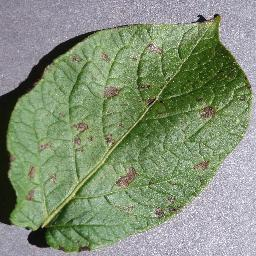

In [34]:
img

In [35]:
x=image.img_to_array(img)


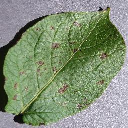

In [44]:
img=image.load_img(r"C:\Users\maris_q3mm6nk\Desktop\FILES\data_for_ibm\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Potato___Early_blight/b817817e-a6b1-4123-88e7-db98b453ce17___RS_Early.B 6880.jpg",target_size=(128,128))
img

In [45]:

x=image.img_to_array(img)


In [46]:
x

array([[[135., 131., 145.],
        [134., 130., 144.],
        [133., 129., 143.],
        ...,
        [166., 164., 178.],
        [188., 186., 200.],
        [213., 211., 225.]],

       [[141., 137., 151.],
        [139., 135., 149.],
        [128., 124., 138.],
        ...,
        [201., 199., 213.],
        [157., 155., 169.],
        [172., 170., 184.]],

       [[136., 132., 146.],
        [135., 131., 145.],
        [141., 137., 151.],
        ...,
        [166., 164., 178.],
        [169., 167., 181.],
        [166., 164., 178.]],

       ...,

       [[163., 161., 175.],
        [154., 152., 166.],
        [160., 158., 172.],
        ...,
        [203., 201., 214.],
        [221., 219., 232.],
        [207., 205., 218.]],

       [[148., 146., 160.],
        [165., 163., 177.],
        [152., 150., 164.],
        ...,
        [176., 174., 187.],
        [192., 190., 203.],
        [189., 187., 200.]],

       [[162., 160., 174.],
        [155., 153., 167.],
        [141., 1

In [47]:
x=np.expand_dims(x,axis=0)


In [48]:
x

array([[[[135., 131., 145.],
         [134., 130., 144.],
         [133., 129., 143.],
         ...,
         [166., 164., 178.],
         [188., 186., 200.],
         [213., 211., 225.]],

        [[141., 137., 151.],
         [139., 135., 149.],
         [128., 124., 138.],
         ...,
         [201., 199., 213.],
         [157., 155., 169.],
         [172., 170., 184.]],

        [[136., 132., 146.],
         [135., 131., 145.],
         [141., 137., 151.],
         ...,
         [166., 164., 178.],
         [169., 167., 181.],
         [166., 164., 178.]],

        ...,

        [[163., 161., 175.],
         [154., 152., 166.],
         [160., 158., 172.],
         ...,
         [203., 201., 214.],
         [221., 219., 232.],
         [207., 205., 218.]],

        [[148., 146., 160.],
         [165., 163., 177.],
         [152., 150., 164.],
         ...,
         [176., 174., 187.],
         [192., 190., 203.],
         [189., 187., 200.]],

        [[162., 160., 174.],
       

In [49]:
y=np.argmax(model.predict(x),axis=1)


1/1 [==============================] - 0s 89ms/step


In [50]:
x_train.class_indices


{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [51]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']


In [52]:
index[y[0]]


'Tomato___Bacterial_spot'

In [53]:
img=image.load_img(r"C:\Users\maris_q3mm6nk\Desktop\FILES\data_for_ibm\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Potato___Early_blight/b817817e-a6b1-4123-88e7-db98b453ce17___RS_Early.B 6880.jpg",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 38ms/step


'Tomato___Bacterial_spot'